In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy.io import wavfile

In [5]:
from dsp.fir import WSFilter
from exp_utils import welch, read_real, read_iq

In [3]:
import warnings
warnings.filterwarnings('ignore')

import os
from os.path import join
root_path = os.getenv('RADIO_PATH', '.')

In [8]:
data_path = join(root_path, 'data/iq_speech')
iq_samples = read_iq(data_path, np.int16)

In [7]:
iq_samples.shape

(12001280,)

### IQ samples spectral density

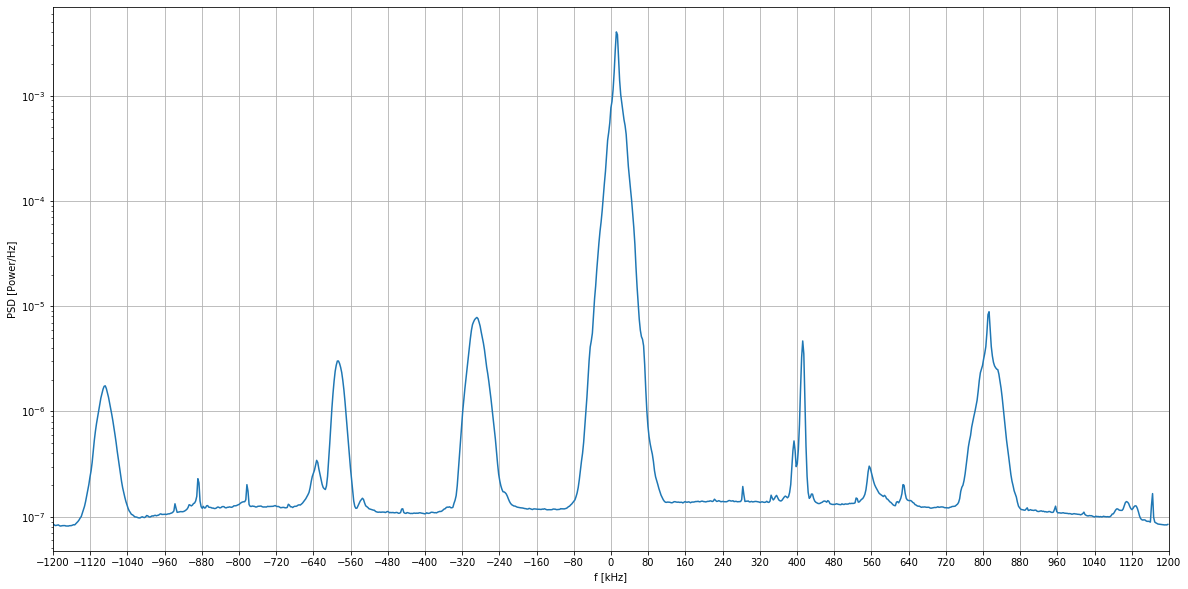

In [9]:
sample_rate = 2400000
welch(iq_samples, sample_rate)

### Now let's compare the effects of offline and online filtering (windowed-sinc).

In [10]:
sample_rate_fm = 240000
M = sample_rate // sample_rate_fm
ws_filter = WSFilter(512, M, 1 / (2 * 1.2 * M))

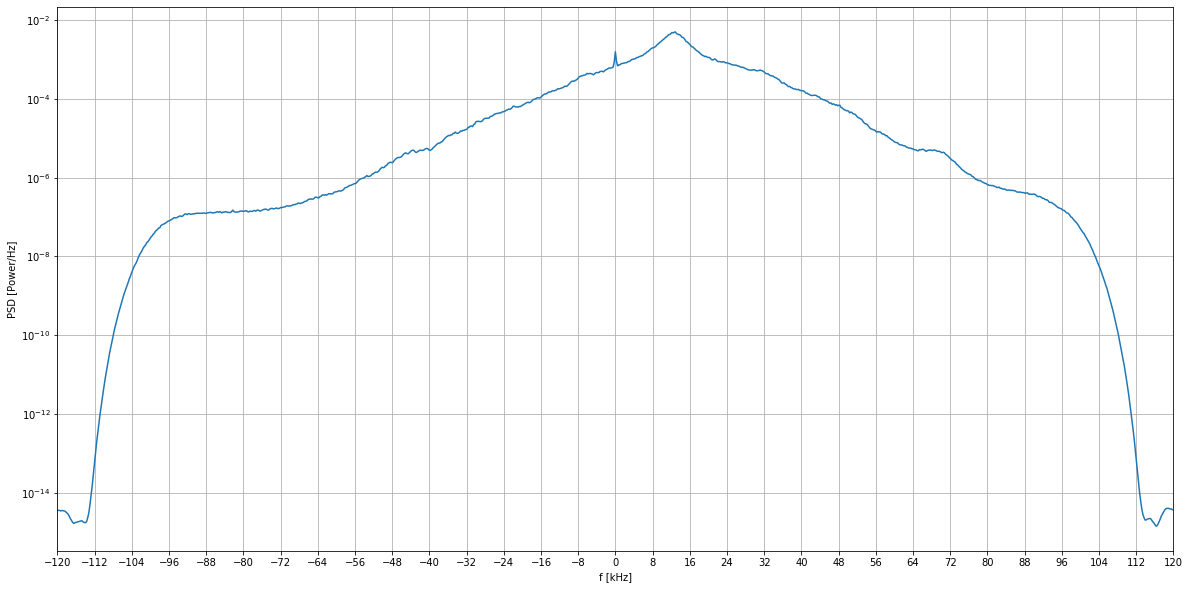

In [17]:
welch(filtered_offline, sample_rate_fm)

In [18]:
r_max = max([abs(c.real) for c in filtered_offline])
scaled_r = [c.real / r_max * 2**15 for c in filtered_offline]
i_max = max([abs(c.imag) for c in filtered_offline])
scaled_i = [c.imag / i_max * 2**15 for c in filtered_offline]
filtered_better = np.array([np.int16(r) + 1j * np.int16(i) for r, i in zip(scaled_r, scaled_i)], dtype=np.complex128)

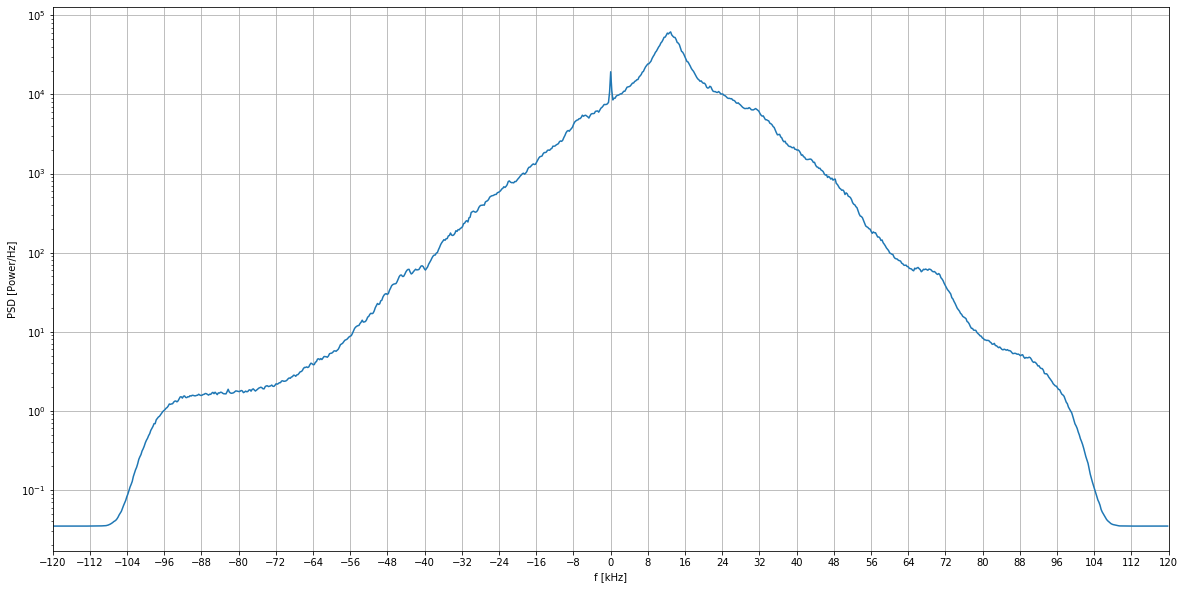

In [19]:
welch(filtered_better, sample_rate_fm)

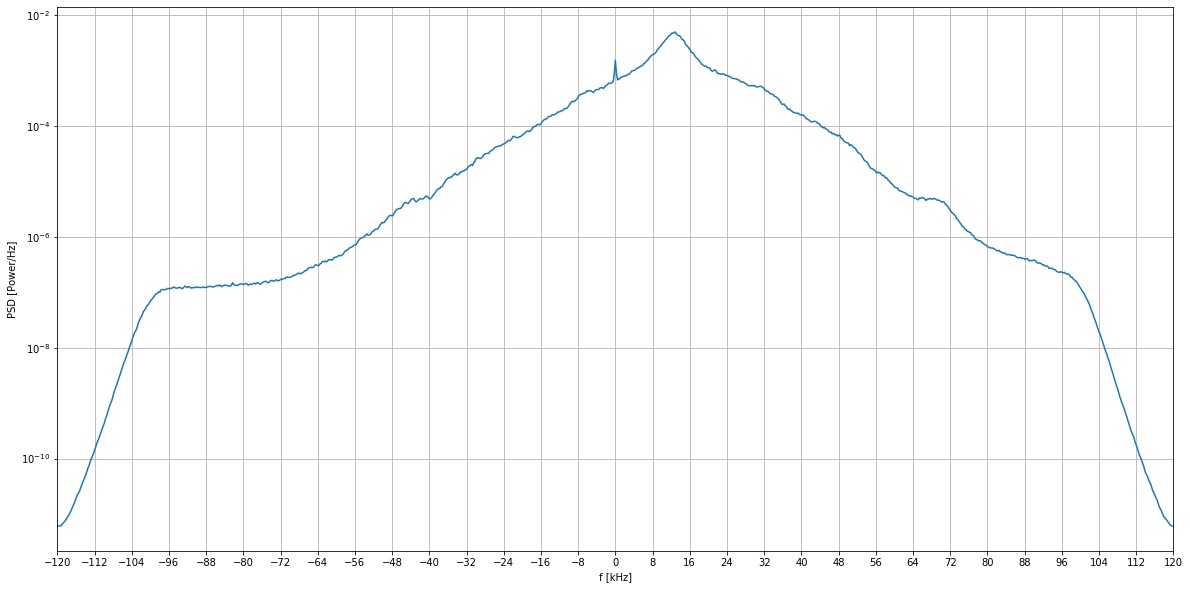

In [22]:
welch(signal.decimate(iq_samples, 10), sample_rate_fm)

In [10]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# TODO: compare that to FIR bandpass...